In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('C:/users/prave/datasets/csv files/Glassdoor Gender Pay Gap.csv')

# Exploring dataset

In [3]:
print("dataset size: {}".format(df.shape))

dataset size: (1000, 9)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   1000 non-null   object
 1   Gender     1000 non-null   object
 2   Age        1000 non-null   int64 
 3   PerfEval   1000 non-null   int64 
 4   Education  1000 non-null   object
 5   Dept       1000 non-null   object
 6   Seniority  1000 non-null   int64 
 7   BasePay    1000 non-null   int64 
 8   Bonus      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


**Note:** No Features has null values in the dataset.

In [5]:
# basic static information
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,41.393,14.294856,18.0,29.00,41.0,54.25,65.0
PerfEval,1000.0,3.037,1.423959,1.0,2.00,3.0,4.00,5.0
Seniority,1000.0,2.971,1.395029,1.0,2.00,3.0,4.00,5.0
BasePay,1000.0,94472.653,25337.493272,34208.0,76850.25,93327.5,111558.00,179726.0
Bonus,1000.0,6467.161,2004.377365,1703.0,4849.50,6507.0,8026.00,11293.0


# Data Visualization

In [6]:
df['JobTitle'].value_counts()

Marketing Associate    118
Software Engineer      109
Financial Analyst      107
Data Scientist         107
Graphic Designer        98
IT                      96
Sales Associate         94
Driver                  91
Warehouse Associate     90
Manager                 90
Name: JobTitle, dtype: int64

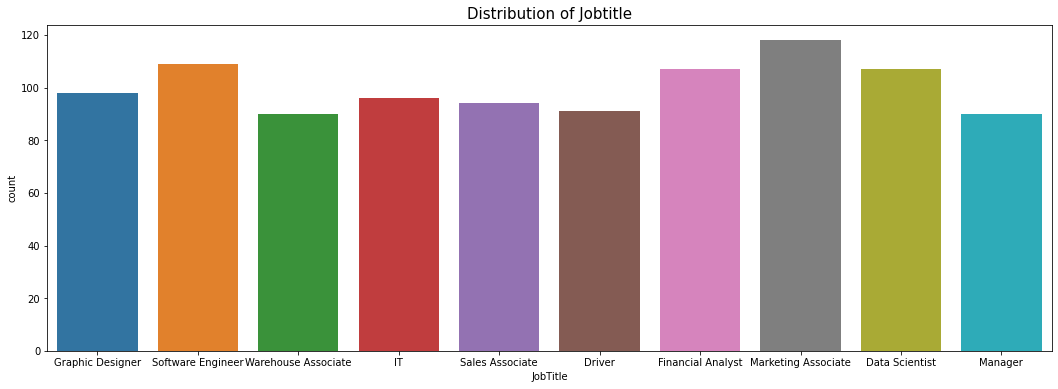

In [7]:
# Countplot for JobTitle feature
plt.figure(figsize=[18,6])
sns.countplot(df['JobTitle'])
plt.title('Distribution of Jobtitle',fontsize=15)
plt.show()

* Most of the People choosing **Marketing Associate** has their carrer option.        

In [9]:
# JobTitle by 'Male'
jobtitle_male=df[df['Gender']=='Male'].groupby(['JobTitle'],as_index=False)['Gender'].count().sort_values(by='Gender',
                                                                                                          ascending=False)
jobtitle_male

,JobTitle,Gender
8,Software Engineer,101
5,Manager,72
2,Financial Analyst,58
0,Data Scientist,54
7,Sales Associate,51
3,Graphic Designer,50
4,IT,46
1,Driver,45
9,Warehouse Associate,44
6,Marketing Associate,11


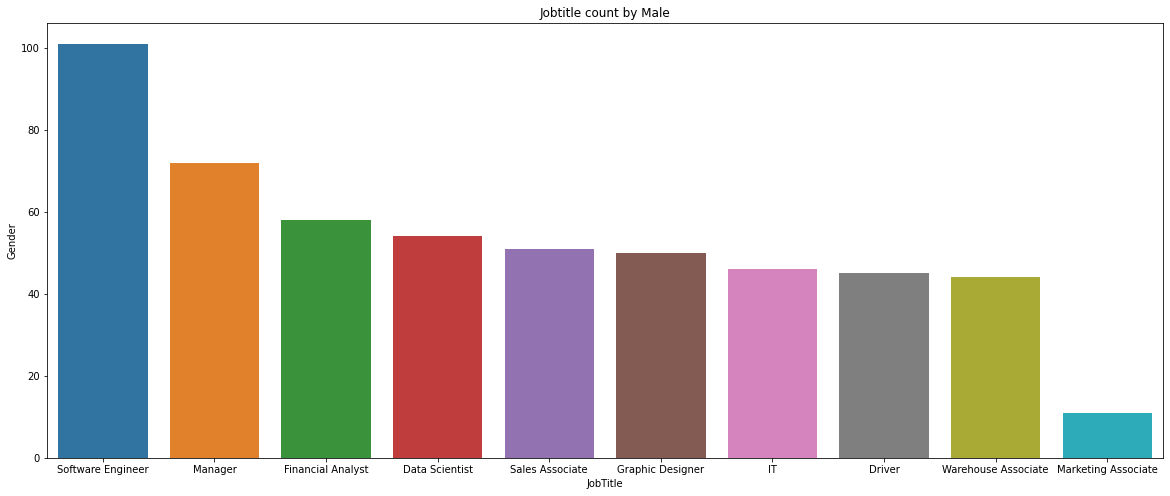

In [10]:
plt.figure(figsize=[20,8])
sns.barplot(x='JobTitle',y='Gender',data=jobtitle_male)
plt.title('Jobtitle count by Male')
plt.show()

**Insight:**           
* Most of the **Mens** are choosing **Software Engineer** has their carrer option.        
* **Mens** are showing least intreset in **Marketing Associate**

In [11]:
# Jobtitle count by 'Female'
jobtitle_female=df[df['Gender']=='Female'].groupby(['JobTitle'],as_index=False)['Gender'].count().sort_values(by='Gender',
                                                                                                              ascending=False)
jobtitle_female.rename(columns={'Gender':'Female_count'},inplace=True)

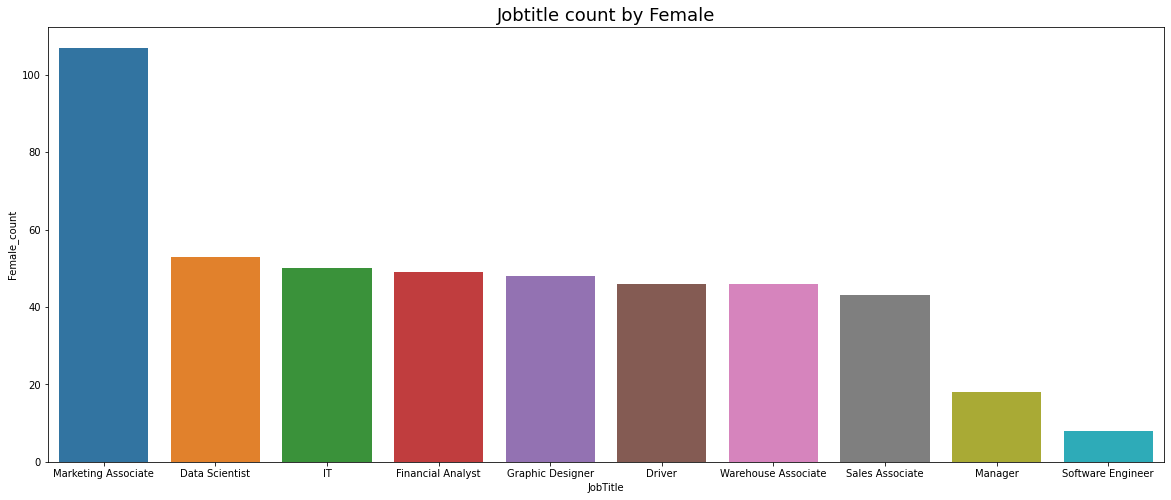

In [12]:
plt.figure(figsize=[20,8])
sns.barplot(x='JobTitle',y='Female_count',data=jobtitle_female)
plt.title('Jobtitle count by Female',fontsize=18)
plt.show()

**Insight:**         
* **Women** Job opting is completely different compared to **Men**.            
* most of the **Womens** are choosing **Marketing Associate** has their carrier option.
* **Womens** are showing least interest in **Software Engineer**

In [13]:
# Average BasePay for job_title    
jobtitle_basepay=df.groupby(['JobTitle'],as_index=False)['BasePay'].mean().sort_values(by='BasePay',ascending=False)
jobtitle_basepay.rename(columns={'BasePay':'avg_Basepay'},inplace=True)
jobtitle_basepay

,JobTitle,avg_Basepay
5,Manager,125329.600000
8,Software Engineer,105514.935780
2,Financial Analyst,94996.878505
7,Sales Associate,93396.489362
0,Data Scientist,92433.420561
3,Graphic Designer,90892.530612
4,IT,90737.468750
9,Warehouse Associate,89556.122222
1,Driver,89382.208791
6,Marketing Associate,76656.372881


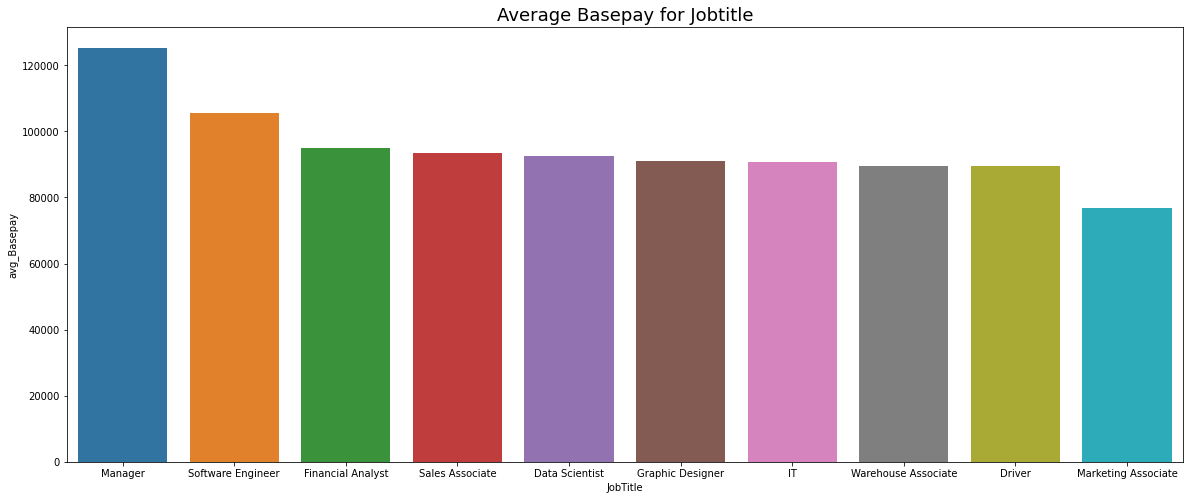

In [14]:
plt.figure(figsize=[20,8])
sns.barplot(x='JobTitle',y='avg_Basepay',data=jobtitle_basepay)
plt.title("Average Basepay for Jobtitle",fontsize=18)
plt.show()

**Insight:** 
* **Manager** has highest average BasePay **i.e.1.2 Lakhs**      
* And **Software Engineer** has 2nd highest average BasePay **i.e. 1 Lakhs**              
* **There is no significant information from Education Feature for job qualification.**

In [15]:
# average PErfEval by Gender
perf_gender=df.groupby(['Gender'],as_index=False)['PerfEval'].mean()
perf_gender

,Gender,PerfEval
0,Female,2.935897
1,Male,3.125940


**Insight:**       
* **Male** Performane is higher compared to **Female**

In [16]:
# perfEval by education
perf_edu=df.groupby('Education',as_index=False)['PerfEval'].mean().sort_values(by='PerfEval',ascending=False)
perf_edu.rename(columns={'PerfEval':'avg_PerfEval'},inplace=True)
perf_edu

,Education,avg_PerfEval
3,PhD,3.134454
0,College,3.082988
2,Masters,3.066406
1,High School,2.879245


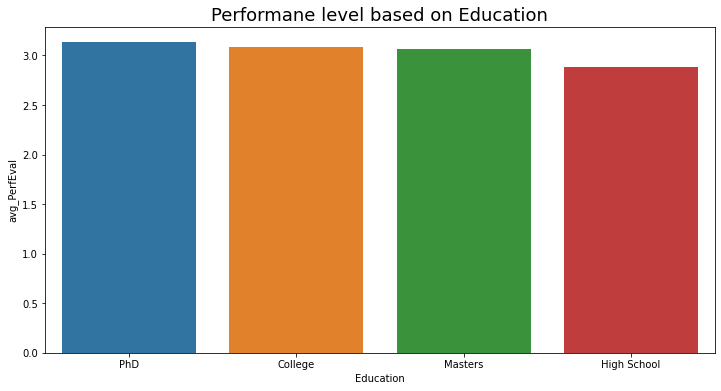

In [17]:
plt.figure(figsize=[12,6])
sns.barplot(x='Education',y='avg_PerfEval',data=perf_edu)
plt.title("Performane level based on Education",fontsize=18)
plt.show()

**Insight:**         
* **PhD** scholar are giving higher average perfomance **i.e 3.1 out of 5**        

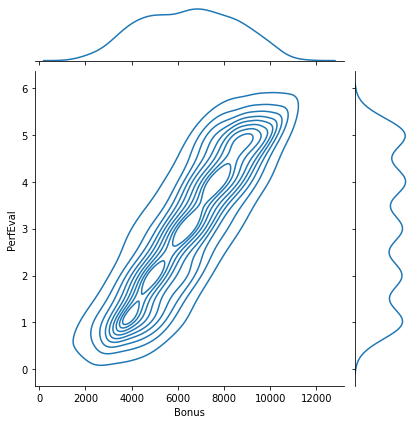

In [18]:
# PErfEval with Bonus
sns.jointplot(x='Bonus',y='PerfEval',data=df,kind='kde')
plt.show()

**Insight:**         
* As PerfEval **increases** Bonus **increases**

In [19]:
basepay_edu=df.groupby(['Education'],as_index=False)['BasePay'].mean().sort_values(by='BasePay',ascending=False)
basepay_edu.rename(columns={'BasePay':'avg_BasePay'})

,Education,avg_BasePay
3,PhD,99880.777311
2,Masters,97595.542969
0,College,92126.597510
1,High School,88732.298113


**Insight:**         
* Higher your education qualification, **Higher** you get Salary

In [20]:
dept_bonus=df.groupby(['Dept'],as_index=False)['Bonus'].mean().sort_values(by='Bonus',ascending=False)
dept_bonus.rename(columns={'Bonus':'avg_Bonus'},inplace=True)

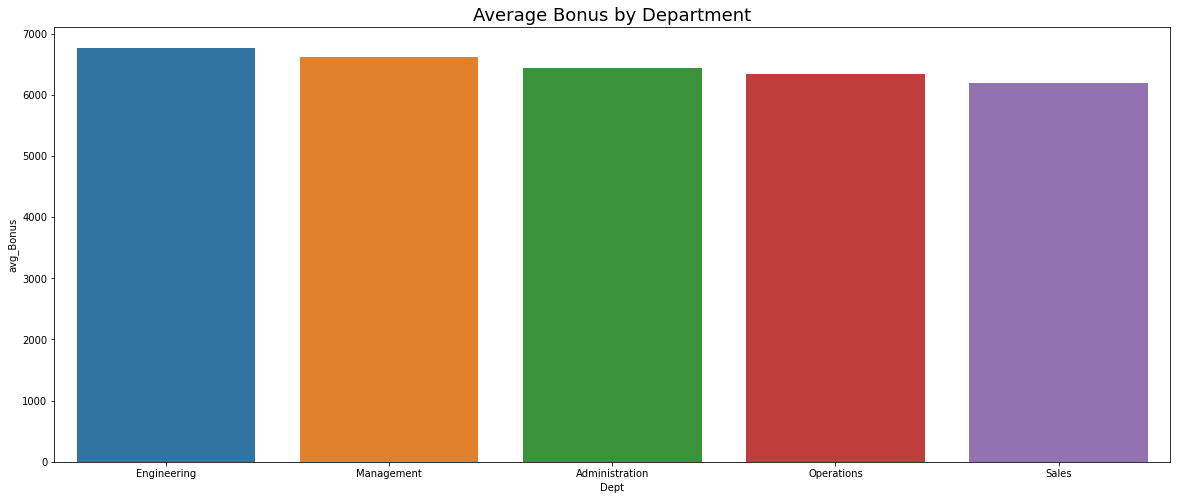

In [21]:
plt.figure(figsize=[20,8])
sns.barplot(x='Dept',y='avg_Bonus',data=dept_bonus)
plt.title('Average Bonus by Department',fontsize=18)
plt.show()

**Insight:**            
* **Engineering** Department people are getting higher Bonus.         
* There is no big  differences in bonu,in between department.So,Bonus are given on performance level in their repective dpartment wise,not generally.

# Feature Engineering           
<!--  -->         
* Adding new feature to the dataset                           

In [22]:
# Adding "total pay" column
df['TotalPay']=df['BasePay']+df['Bonus']

In [25]:
# convert 'Gender' column from object into binary
df['Gender'].replace({'Male':1,'Female':0},inplace=True)

In [26]:
df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus,TotalPay
0,Graphic Designer,0,18,5,College,Operations,2,42363,9938,52301
1,Software Engineer,1,21,5,College,Management,5,108476,11128,119604
2,Warehouse Associate,0,19,4,PhD,Administration,5,90208,9268,99476
3,Software Engineer,1,20,5,Masters,Sales,4,108080,10154,118234
4,Graphic Designer,1,26,5,Masters,Engineering,5,99464,9319,108783


# Conclusion                 
<!--  -->                
* Most of the **Womens** choosing **Marketing Associate** has their carrier option.                 
* Most Of the **Mens** choosing **Software Engineering** has their carrier option.           
* **Male** Performane level are better than **Female**             
* **Managers** are getting higher average BasePay **i.e 1.2 Lakhs**           
* **Engineering** Department people are getting higher Bonus.
* **PhD** Scholar are getting higher Salary then others.               
* **PhD** Scholar are have high performane level ratings then others.         
* As Performance rating **Increases** Bonu **Increases**.           